In [1]:
import os
import mdtraj as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and

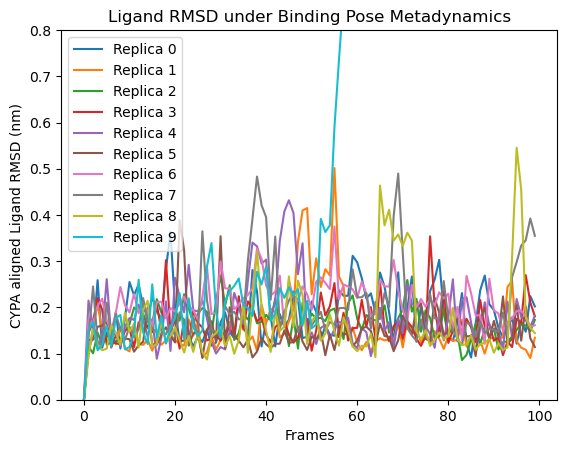

In [11]:
def rmsd_analysis(traj_files, top_file, slice_step=1):
    for i, traj_file in enumerate(traj_files):
        traj = md.load(traj_file, top=top_file)[::slice_step]
        traj.image_molecules(inplace=True)
        protein_atoms = traj.topology.select('protein and name CA')
        traj.superpose(traj, frame=0, atom_indices=protein_atoms)
        ligand_atoms = traj.topology.select('resname UNK')
        result = traj.xyz[:, ligand_atoms, :] - traj.xyz[0, ligand_atoms, :]
        ligand_rmsd = np.sqrt((result ** 2).sum(axis=-1).mean(axis=-1))
        plt.plot(ligand_rmsd, label=f'Replica {i}')
        #traj.save(f'rep{i}_processed.xtc')

rmsd_analysis(['rep_' + str(i) + '/trj.dcd' for i in range(10)], 'minimized_system.pdb')
plt.xlabel('Frames')
plt.ylabel('CYPA aligned Ligand RMSD (nm)')
plt.title('Ligand RMSD under Binding Pose Metadynamics')
plt.ylim(0, 0.8)
plt.legend()
plt.show()

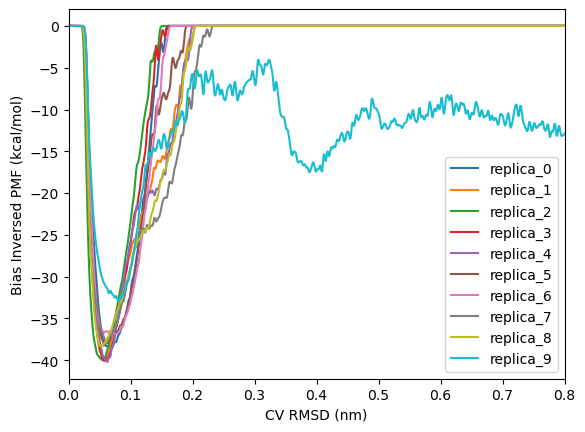

In [16]:
import glob
rmsd_min = 0.0
rmsd_max = 1.0
num_grid_points = 2500
rmsd_axis = np.linspace(rmsd_min, rmsd_max, num_grid_points)
# Plotting Bias Inversed PMF for each replica
for i in range(10):
    file = glob.glob(os.path.join(f'rep_{i}', 'bias_*.npy'))
    bias = np.load(file[0]).squeeze()
    pmf = -bias
    plt.plot(rmsd_axis, pmf, label=f'replica_{i}')
plt.xlabel('CV RMSD (nm)')
plt.ylabel('Bias Inversed PMF (kcal/mol)')
plt.xlim(0, 0.8)
plt.legend()
plt.show()